In [1]:
import pandas as pd
from sqlalchemy import create_engine

In [2]:
username = 'postgres'       # your PostgreSQL username
password = 'password'  # your PostgreSQL password
host = 'localhost'          # or your DB host
port = '5432'               # default PostgreSQL port
database = 'JPM'  


In [3]:
engine = create_engine(f'postgresql://{username}:{password}@{host}:{port}/{database}')


In [4]:
income = pd.read_sql('SELECT * FROM income_statement_cleaned', engine)
balance = pd.read_sql('SELECT * FROM balance_sheet', engine)
cashflow = pd.read_sql('SELECT * FROM cash_flow', engine)
stock = pd.read_sql('SELECT * FROM stock_data', engine)

In [5]:

income['report_date'] = pd.to_datetime(income['report_date'])
balance['report_date'] = pd.to_datetime(balance['report_date'])
cashflow['report_date'] = pd.to_datetime(cashflow['report_date'])
stock['date'] = pd.to_datetime(stock['date'])


In [6]:
financials = income.merge(balance, on='report_date', how='outer') \
                   .merge(cashflow, on='report_date', how='outer')


In [7]:
print(financials.columns.tolist())


['report_date', 'Tax Effect Of Unusual Items', 'Tax Rate For Calcs', 'Total Unusual Items', 'Total Unusual Items Excluding Goodwill', 'Net Income From Continuing Operation Net Minority Interest', 'Reconciled Depreciation', 'Net Interest Income', 'Interest Expense', 'Interest Income', 'Normalized Income', 'Net Income From Continuing And Discontinued Operation', 'Diluted Average Shares', 'Basic Average Shares', 'Diluted EPS', 'Basic EPS', 'Diluted NI Availto Com Stockholders', 'Net Income Common Stockholders', 'Otherunder Preferred Stock Dividend', 'Preferred Stock Dividends', 'Net Income', 'Net Income Including Noncontrolling Interests', 'Net Income Continuous Operations', 'Tax Provision', 'Pretax Income', 'Special Income Charges', 'Other Special Charges', 'Restructuring And Mergern Acquisition', 'Gain On Sale Of Security', 'Selling General And Administration', 'Selling And Marketing Expense', 'General And Administrative Expense', 'Other Gand A', 'Salaries And Wages', 'Total Revenue', '

In [8]:
financials['net_income_billion'] = financials['Net Income From Continuing Operations'] / 1e9


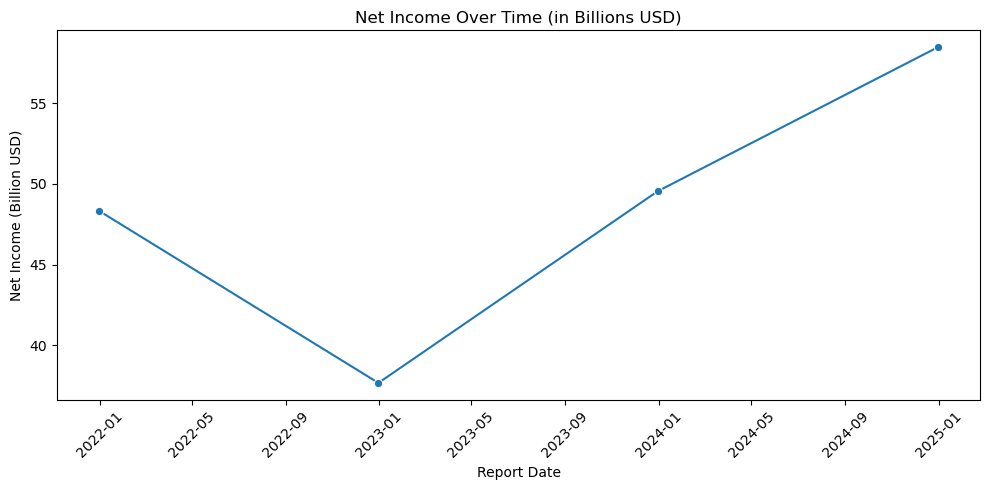

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

financials['net_income_billion'] = financials['Net Income From Continuing Operations'] / 1e9

plt.figure(figsize=(10, 5))
sns.lineplot(data=financials, x='report_date', y='net_income_billion', marker='o')
plt.title("Net Income Over Time (in Billions USD)")
plt.xlabel("Report Date")
plt.ylabel("Net Income (Billion USD)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


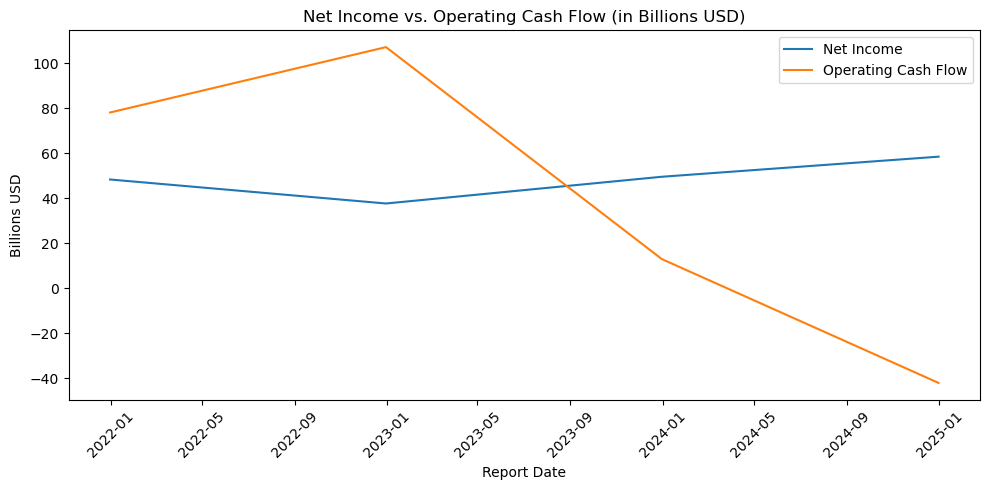

In [10]:
financials['operating_cash_flow_billion'] = financials['Operating Cash Flow'] / 1e9

plt.figure(figsize=(10, 5))
sns.lineplot(data=financials, x='report_date', y='net_income_billion', label='Net Income')
sns.lineplot(data=financials, x='report_date', y='operating_cash_flow_billion', label='Operating Cash Flow')
plt.title("Net Income vs. Operating Cash Flow (in Billions USD)")
plt.xlabel("Report Date")
plt.ylabel("Billions USD")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [11]:
financials['eps'] = financials['Diluted EPS']


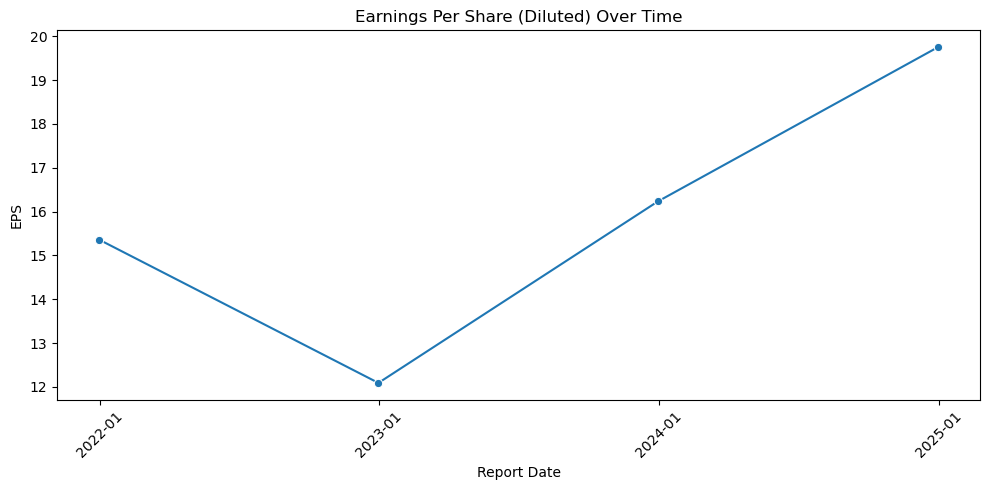

In [12]:
import matplotlib.dates as mdates

plt.figure(figsize=(10, 5))
sns.lineplot(data=financials, x='report_date', y='eps', marker='o')
plt.title("Earnings Per Share (Diluted) Over Time")
plt.xlabel("Report Date")
plt.ylabel("EPS")

# Format x-axis dates properly
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


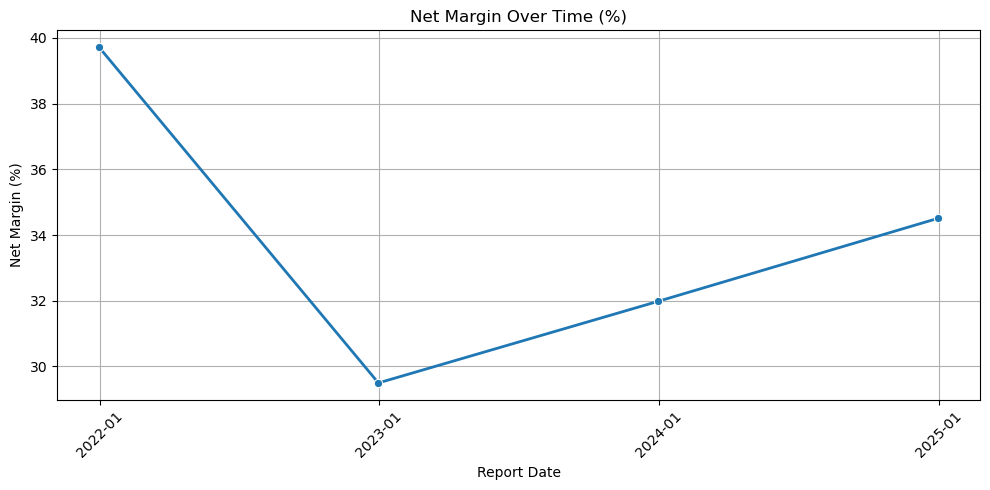

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

# Calculate Net Margin %
financials['net_margin'] = financials['Net Income'] / financials['Total Revenue'] * 100

# Plot
plt.figure(figsize=(10, 5))
sns.lineplot(data=financials, x='report_date', y='net_margin', marker='o', linewidth=2)

plt.title("Net Margin Over Time (%)")
plt.xlabel("Report Date")
plt.ylabel("Net Margin (%)")

# Format x-axis as dates
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.xticks(rotation=45)

plt.grid(True)
plt.tight_layout()
plt.show()


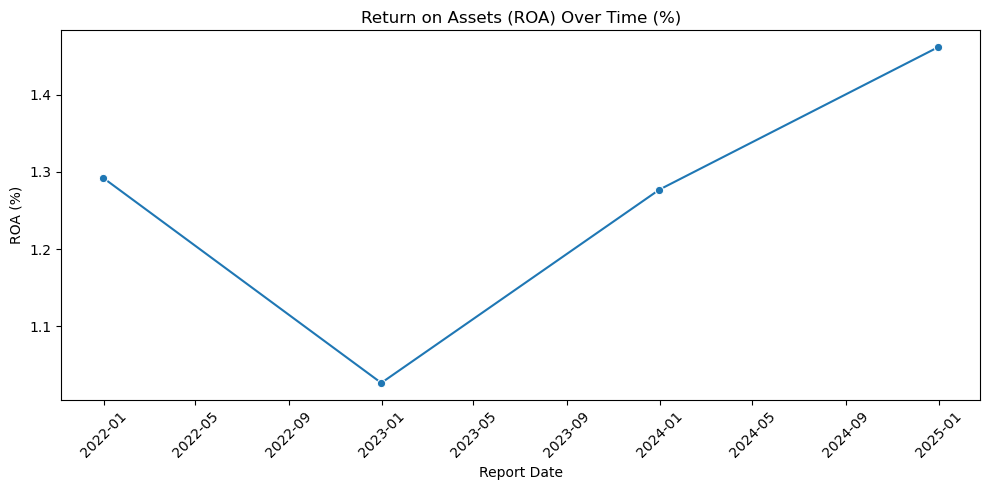

In [14]:
# Calculate ROA
financials['roa'] = financials['Net Income'] / financials['Total Assets']
financials['roa_percent'] = financials['roa'] * 100

# Plot ROA
plt.figure(figsize=(10, 5))
sns.lineplot(data=financials, x='report_date', y='roa_percent', marker='o')
plt.title("Return on Assets (ROA) Over Time (%)")
plt.xlabel("Report Date")
plt.ylabel("ROA (%)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


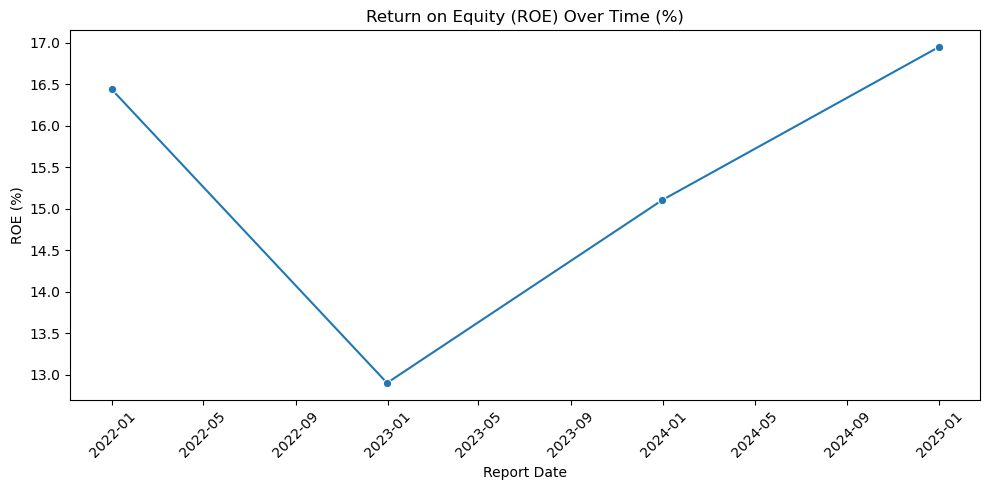

In [15]:
# Calculate ROE
financials['roe'] = financials['Net Income'] / financials['Stockholders Equity']
financials['roe_percent'] = financials['roe'] * 100

# Plot ROE
plt.figure(figsize=(10, 5))
sns.lineplot(data=financials, x='report_date', y='roe_percent', marker='o')
plt.title("Return on Equity (ROE) Over Time (%)")
plt.xlabel("Report Date")
plt.ylabel("ROE (%)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


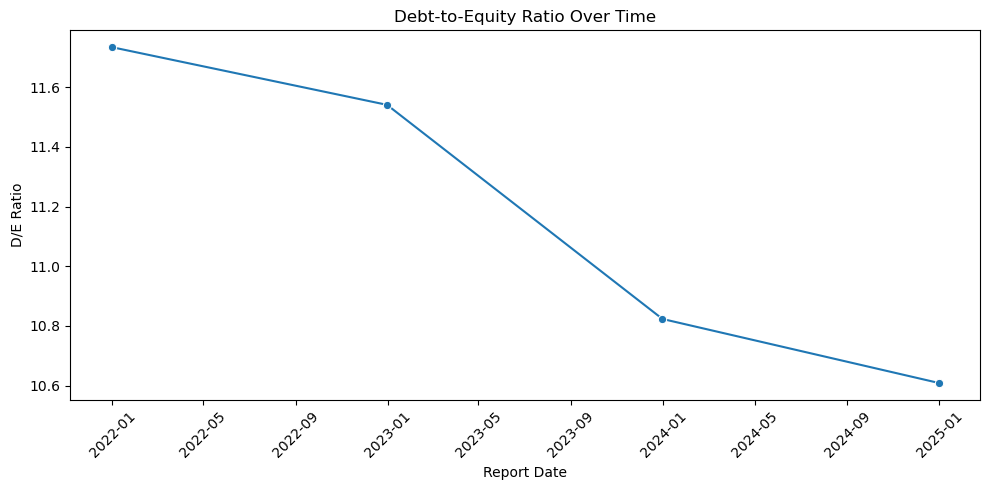

In [16]:
# Calculate Debt-to-Equity Ratio
financials['de_ratio'] = financials['Total Liabilities Net Minority Interest'] / financials['Stockholders Equity']

# Plot Debt-to-Equity Ratio
plt.figure(figsize=(10, 5))
sns.lineplot(data=financials, x='report_date', y='de_ratio', marker='o')
plt.title("Debt-to-Equity Ratio Over Time")
plt.xlabel("Report Date")
plt.ylabel("D/E Ratio")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


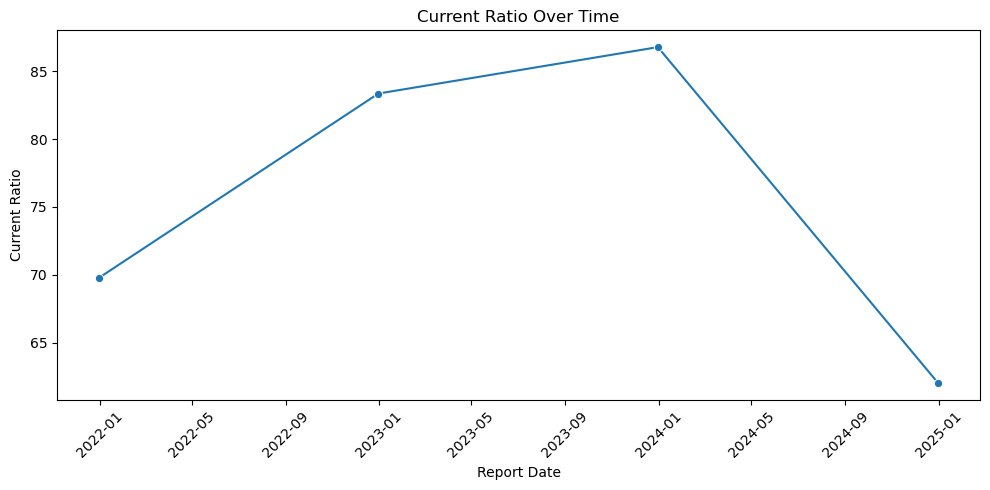

In [17]:
# Calculate Current Ratio
financials['current_ratio'] = financials['Total Assets'] / financials['Current Debt']

# Plot Current Ratio
plt.figure(figsize=(10, 5))
sns.lineplot(data=financials, x='report_date', y='current_ratio', marker='o')
plt.title("Current Ratio Over Time")
plt.xlabel("Report Date")
plt.ylabel("Current Ratio")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

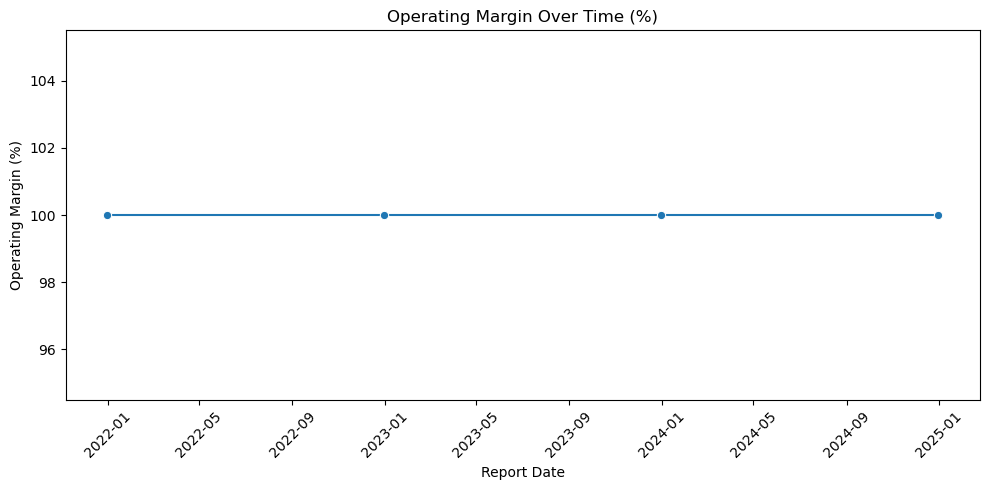

In [18]:
# Calculate Operating Margin
financials['operating_margin'] = financials['Operating Revenue'] / financials['Total Revenue']
financials['operating_margin_percent'] = financials['operating_margin'] * 100

# Plot Operating Margin
plt.figure(figsize=(10, 5))
sns.lineplot(data=financials, x='report_date', y='operating_margin_percent', marker='o')
plt.title("Operating Margin Over Time (%)")
plt.xlabel("Report Date")
plt.ylabel("Operating Margin (%)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [19]:
[col for col in financials.columns if 'free cash' in col.lower()]



['Free Cash Flow']

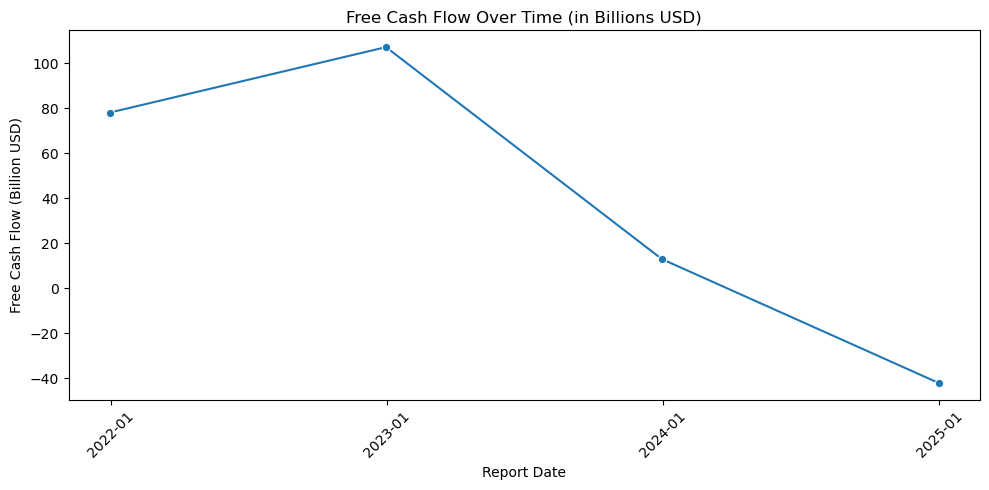

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

# Convert to billions if needed (skip if already done)
financials['free_cash_flow_billion'] = financials['Free Cash Flow'] / 1e9

# Plot
plt.figure(figsize=(10, 5))
sns.lineplot(data=financials, x='report_date', y='free_cash_flow_billion', marker='o')
plt.title("Free Cash Flow Over Time (in Billions USD)")
plt.xlabel("Report Date")
plt.ylabel("Free Cash Flow (Billion USD)")
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [21]:
[col for col in financials.columns if 'equity' in col.lower()]


['Common Stock Equity',
 'Preferred Stock Equity',
 'Total Equity Gross Minority Interest',
 'Stockholders Equity',
 'Other Equity Adjustments']

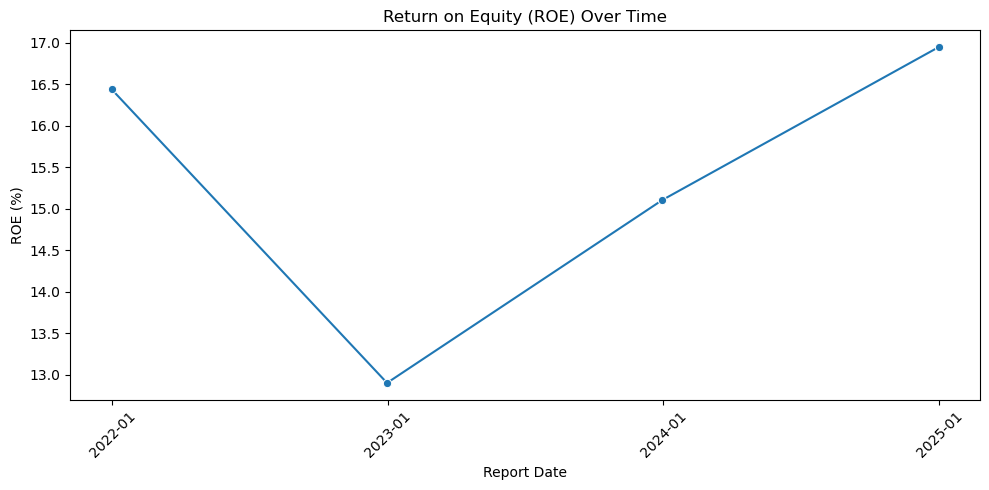

In [22]:
# Calculate ROE in percentage
financials['roe_percent'] = (financials['Net Income'] / financials['Stockholders Equity']) * 100

# Plot
plt.figure(figsize=(10, 5))
sns.lineplot(data=financials, x='report_date', y='roe_percent', marker='o')
plt.title("Return on Equity (ROE) Over Time")
plt.xlabel("Report Date")
plt.ylabel("ROE (%)")
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [23]:
[col for col in financials.columns if 'liabil' in col.lower()]
[col for col in financials.columns if 'equity' in col.lower()]


['Common Stock Equity',
 'Preferred Stock Equity',
 'Total Equity Gross Minority Interest',
 'Stockholders Equity',
 'Other Equity Adjustments']

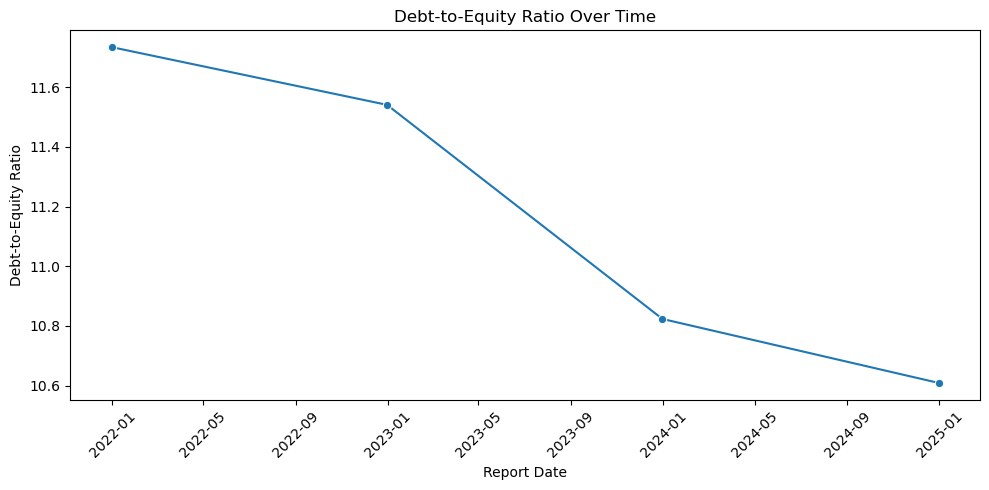

In [24]:
# Calculate Debt-to-Equity Ratio
financials['de_ratio'] = financials['Total Liabilities Net Minority Interest'] / financials['Stockholders Equity']

# Plot
plt.figure(figsize=(10, 5))
sns.lineplot(data=financials, x='report_date', y='de_ratio', marker='o')
plt.title("Debt-to-Equity Ratio Over Time")
plt.xlabel("Report Date")
plt.ylabel("Debt-to-Equity Ratio")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [25]:
financials = income.merge(balance, on='report_date', how='outer') \
                   .merge(cashflow, on='report_date', how='outer')


In [26]:
income = pd.read_sql('SELECT * FROM income_statement_cleaned', engine)
balance = pd.read_sql('SELECT * FROM balance_sheet', engine)
cashflow = pd.read_sql('SELECT * FROM cash_flow', engine)
financials = income.merge(balance, on='report_date', how='outer') \
                   .merge(cashflow, on='report_date', how='outer')


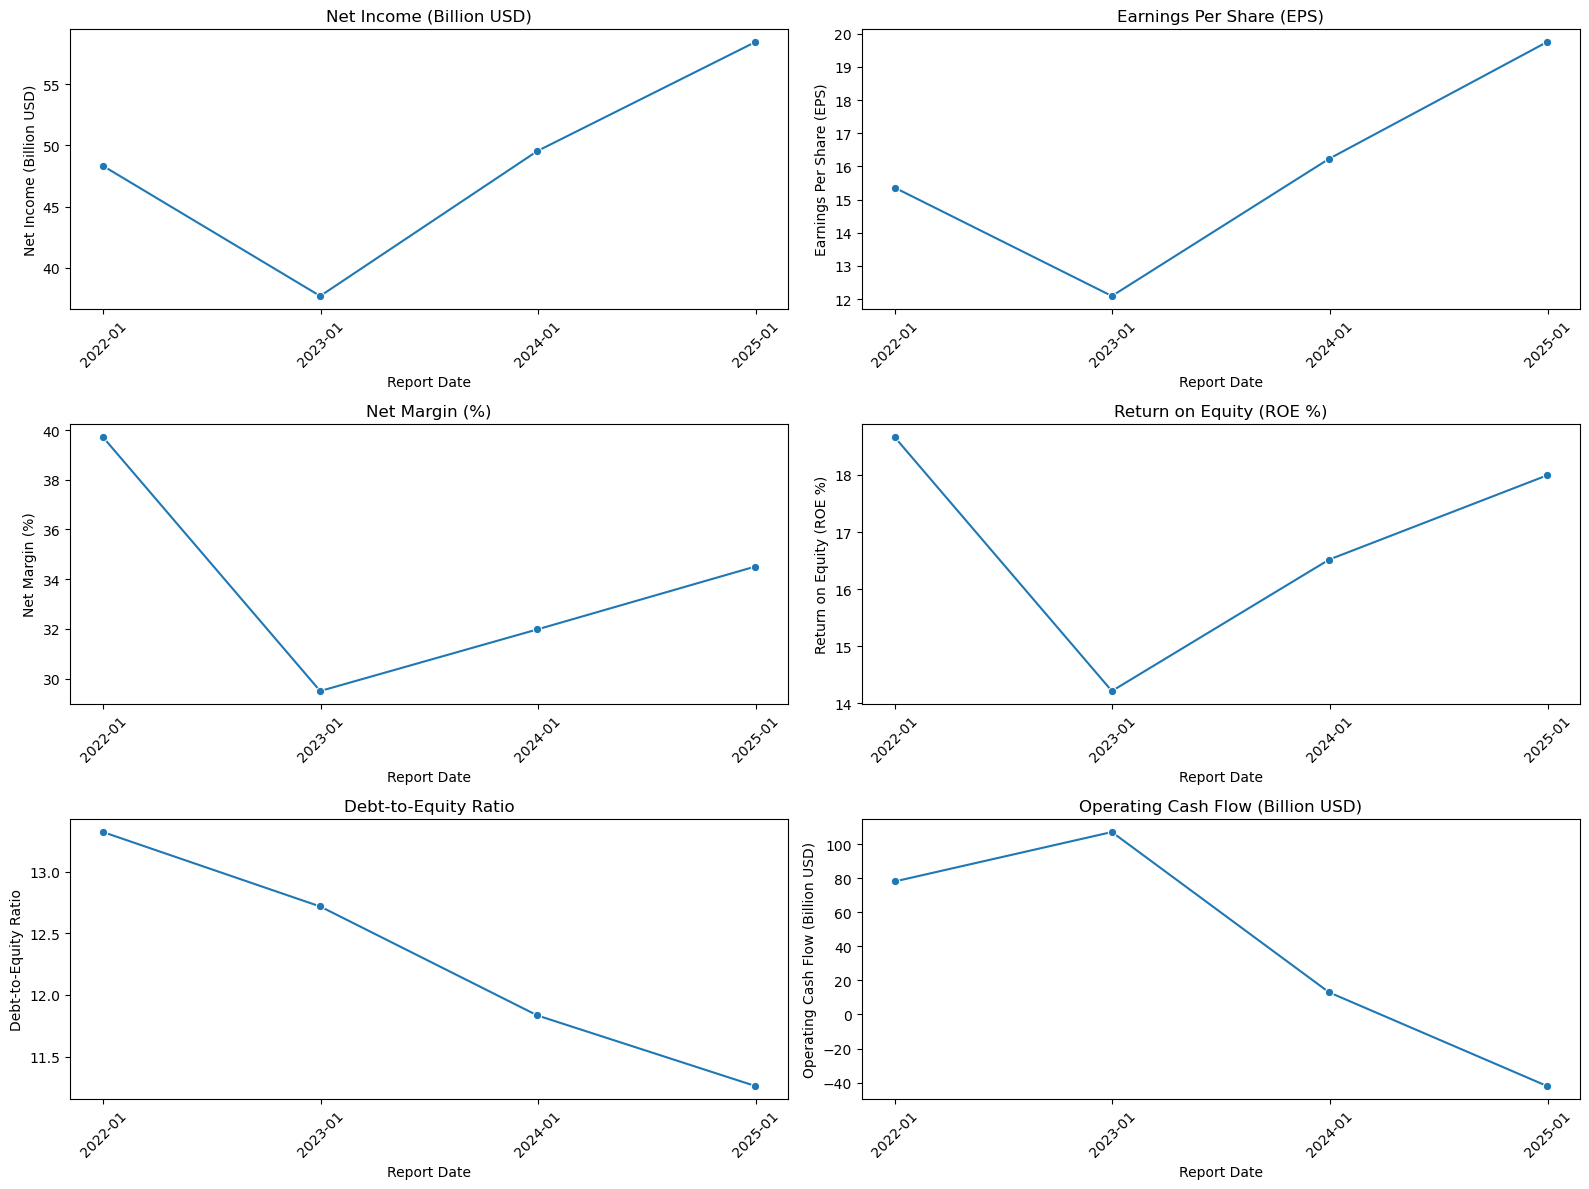

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

# Create new metrics if needed
financials['net_income_billion'] = financials['Net Income From Continuing Operation Net Minority Interest'] / 1e9
financials['eps'] = financials['Diluted EPS']
financials['net_margin'] = (financials['Net Income From Continuing Operation Net Minority Interest'] / financials['Total Revenue']) * 100
financials['roe'] = (financials['Net Income From Continuing Operation Net Minority Interest'] / financials['Common Stock Equity']) * 100
financials['de_ratio'] = financials['Total Liabilities Net Minority Interest'] / financials['Common Stock Equity']
financials['operating_cash_flow_billion'] = financials['Operating Cash Flow'] / 1e9

# Plot
fig, axes = plt.subplots(3, 2, figsize=(16, 12))
axes = axes.flatten()

metrics = [
    ('net_income_billion', 'Net Income (Billion USD)'),
    ('eps', 'Earnings Per Share (EPS)'),
    ('net_margin', 'Net Margin (%)'),
    ('roe', 'Return on Equity (ROE %)'),
    ('de_ratio', 'Debt-to-Equity Ratio'),
    ('operating_cash_flow_billion', 'Operating Cash Flow (Billion USD)')
]

for ax, (metric, label) in zip(axes, metrics):
    sns.lineplot(data=financials, x='report_date', y=metric, marker='o', ax=ax)
    ax.set_title(label)
    ax.set_xlabel("Report Date")
    ax.set_ylabel(label)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    ax.xaxis.set_major_locator(mdates.YearLocator())
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


In [28]:
import yfinance as yf
import pandas as pd

# Load Bank of America ticker
ticker_bac = yf.Ticker("BAC")

# Get income statement and transpose it
income_bac = ticker_bac.financials.T
income_bac.reset_index(inplace=True)
income_bac.rename(columns={'index': 'report_date'}, inplace=True)
income_bac['report_date'] = pd.to_datetime(income_bac['report_date'])

# Preview
income_bac.head()


,report_date,Tax Effect Of Unusual Items,Tax Rate For Calcs,Total Unusual Items,Total Unusual Items Excluding Goodwill,Net Income From Continuing Operation Net Minority Interest,Reconciled Depreciation,Net Interest Income,Interest Expense,Interest Income,...,Selling General And Administration,Selling And Marketing Expense,General And Administrative Expense,Other Gand A,Salaries And Wages,Total Revenue,Operating Revenue,Occupancy And Equipment,Professional Expense And Contract Services Expense,Other Non Interest Expense
0,2024-12-31,0.0,0.073,NaN,NaN,27132000000.0,2189000000.0,56060000000.0,90547000000.0,146607000000.0,...,49623000000.0,5450000000.0,44173000000.0,3991000000.0,40182000000.0,101887000000.0,101887000000.0,7289000000.0,2669000000.0,7231000000.0
1,2023-12-31,-134400000.0,0.064,-2100000000.0,-2100000000.0,26515000000.0,2057000000.0,56931000000.0,73331000000.0,130262000000.0,...,47715000000.0,5535000000.0,42180000000.0,3850000000.0,38330000000.0,98581000000.0,98581000000.0,7164000000.0,2159000000.0,6707000000.0
2,2022-12-31,0.0,0.111,NaN,NaN,27528000000.0,1978000000.0,52462000000.0,20103000000.0,72565000000.0,...,45946000000.0,5478000000.0,40468000000.0,4021000000.0,36447000000.0,94950000000.0,94950000000.0,7071000000.0,2142000000.0,6279000000.0
3,2021-12-31,0.0,0.058806,NaN,NaN,31978000000.0,1898000000.0,42934000000.0,4738000000.0,47672000000.0,...,45049000000.0,5820000000.0,39229000000.0,3089000000.0,36140000000.0,89113000000.0,89113000000.0,7138000000.0,1775000000.0,5769000000.0
4,2020-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
# 1. Net Income in billions
income_bac['net_income_billion'] = income_bac['Net Income From Continuing Operation Net Minority Interest'] / 1e9

# 2. EPS - use Diluted EPS or Basic EPS
income_bac['eps'] = income_bac['Diluted EPS']  # or 'Basic EPS'

# 3. Net Margin = Net Income / Total Revenue
income_bac['net_margin'] = (
    income_bac['Net Income From Continuing Operation Net Minority Interest'] /
    income_bac['Total Revenue']
) * 100

# Preview the results
income_bac[['report_date', 'net_income_billion', 'eps', 'net_margin']]


,report_date,net_income_billion,eps,net_margin
0,2024-12-31,27.132,3.21,26.629501
1,2023-12-31,26.515,3.08,26.896664
2,2022-12-31,27.528,3.19,28.992101
3,2021-12-31,31.978,3.57,35.884776
4,2020-12-31,NaN,NaN,NaN


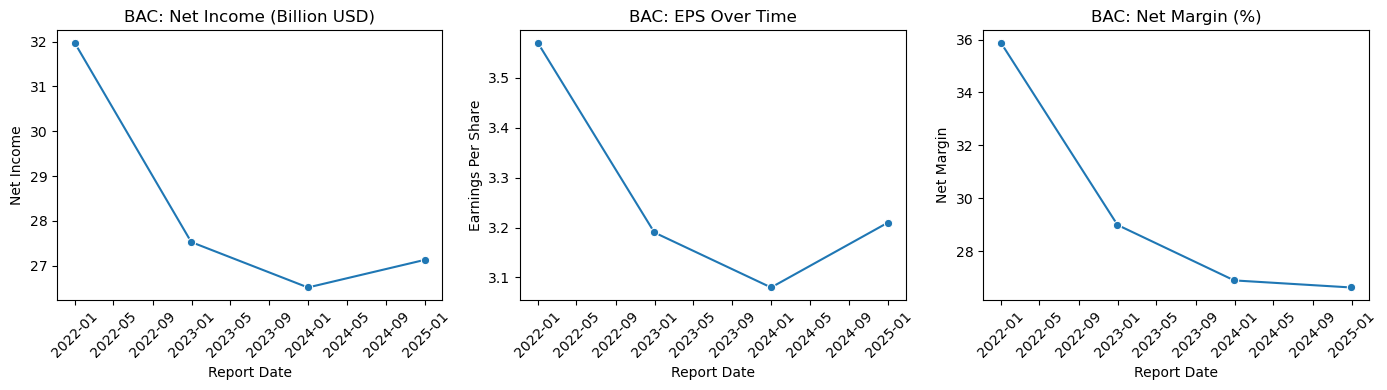

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

plt.figure(figsize=(14, 4))

# 1. Net Income
plt.subplot(1, 3, 1)
sns.lineplot(data=income_bac, x='report_date', y='net_income_billion', marker='o')
plt.title('BAC: Net Income (Billion USD)')
plt.xlabel('Report Date')
plt.ylabel('Net Income')
plt.xticks(rotation=45)

# 2. EPS
plt.subplot(1, 3, 2)
sns.lineplot(data=income_bac, x='report_date', y='eps', marker='o')
plt.title('BAC: EPS Over Time')
plt.xlabel('Report Date')
plt.ylabel('Earnings Per Share')
plt.xticks(rotation=45)

# 3. Net Margin
plt.subplot(1, 3, 3)
sns.lineplot(data=income_bac, x='report_date', y='net_margin', marker='o')
plt.title('BAC: Net Margin (%)')
plt.xlabel('Report Date')
plt.ylabel('Net Margin')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [31]:
import yfinance as yf
import pandas as pd

# Load JPMorgan ticker
ticker_jpm = yf.Ticker("JPM")

# Get income statement and transpose it
income_jpm = ticker_jpm.financials.T
income_jpm.reset_index(inplace=True)
income_jpm.rename(columns={'index': 'report_date'}, inplace=True)
income_jpm['report_date'] = pd.to_datetime(income_jpm['report_date'])

# Add calculated metrics (same as BAC)
income_jpm['net_income_billion'] = income_jpm['Net Income From Continuing Operation Net Minority Interest'] / 1e9
income_jpm['eps'] = income_jpm['Diluted EPS']
income_jpm['net_margin'] = (
    income_jpm['Net Income From Continuing Operation Net Minority Interest'] /
    income_jpm['Total Revenue']
) * 100


In [32]:
# Add a column to identify the bank
income_jpm['Bank'] = 'JPMorgan'
income_bac['Bank'] = 'Bank of America'

# Select the relevant columns for comparison
cols = ['report_date', 'net_income_billion', 'eps', 'net_margin', 'Bank']

# Combine the two datasets
comparison_df = pd.concat([income_jpm[cols], income_bac[cols]], ignore_index=True)


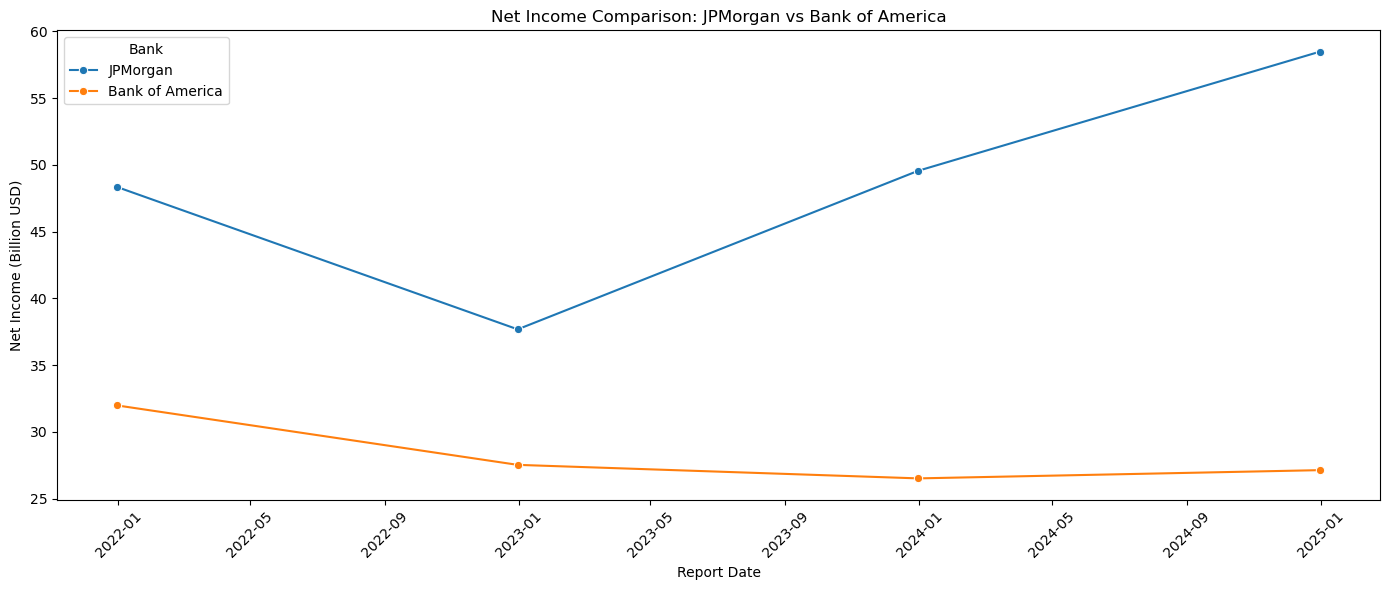

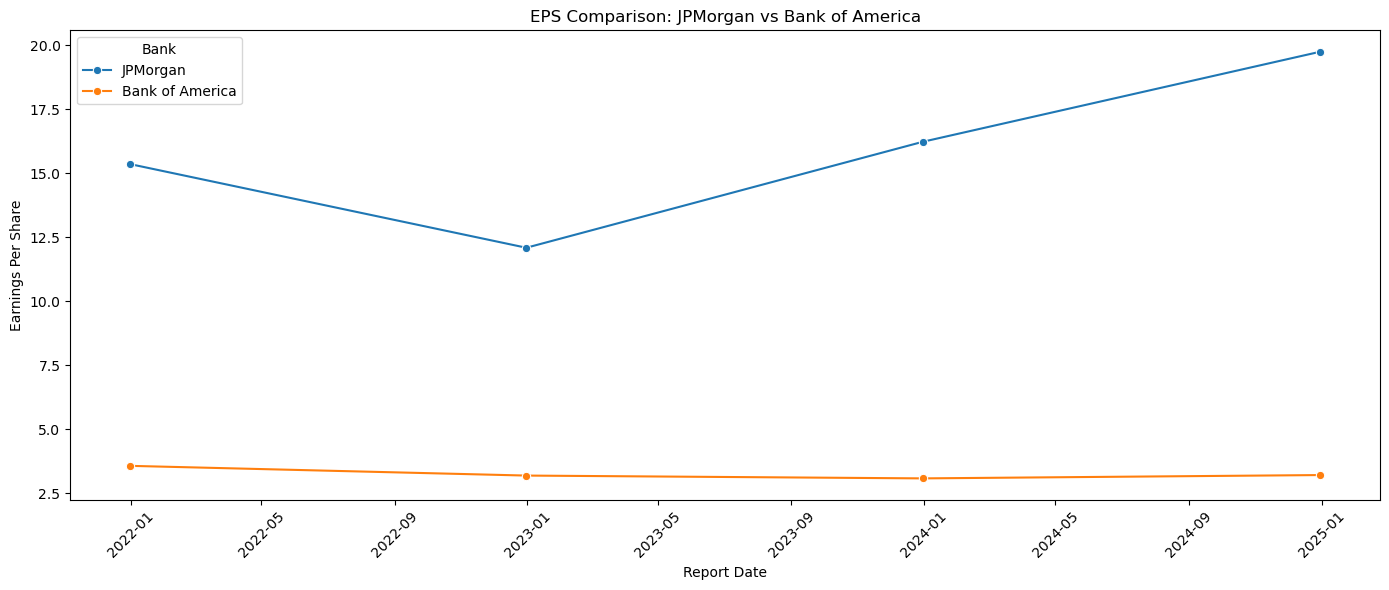

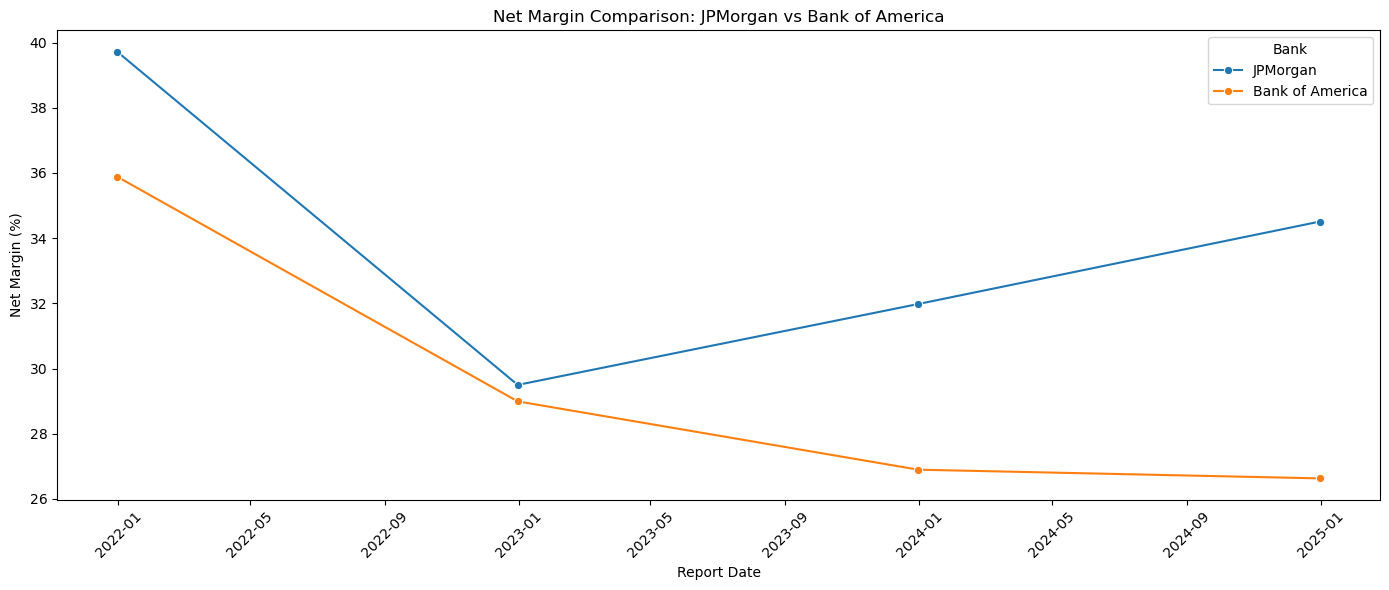

In [49]:
plt.figure(figsize=(14, 6))

# Net Income Comparison
sns.lineplot(data=comparison_df, x='report_date', y='net_income_billion', hue='Bank', marker='o')
plt.title('Net Income Comparison: JPMorgan vs Bank of America')
plt.xlabel('Report Date')
plt.ylabel('Net Income (Billion USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("Net Income Comparison.png", dpi=300, bbox_inches='tight')
plt.show()

# EPS Comparison
plt.figure(figsize=(14, 6))
sns.lineplot(data=comparison_df, x='report_date', y='eps', hue='Bank', marker='o')
plt.title('EPS Comparison: JPMorgan vs Bank of America')
plt.xlabel('Report Date')
plt.ylabel('Earnings Per Share')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("EPS Comparison.png", dpi=300, bbox_inches='tight')
plt.show()

# Net Margin Comparison
plt.figure(figsize=(14, 6))
sns.lineplot(data=comparison_df, x='report_date', y='net_margin', hue='Bank', marker='o')
plt.title('Net Margin Comparison: JPMorgan vs Bank of America')
plt.xlabel('Report Date')
plt.ylabel('Net Margin (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("Net Margin Comparison.png", dpi=300, bbox_inches='tight')
plt.show()


In [35]:
[col for col in income_jpm.columns if 'equity' in col.lower()]
[col for col in income_bac.columns if 'equity' in col.lower()]


[]

In [37]:
financials_jpm = income_jpm.merge(balance, on='report_date', how='outer') \
                           .merge(cashflow, on='report_date', how='outer')


In [38]:
[col for col in financials_jpm.columns if 'equity' in col.lower()]


['Common Stock Equity',
 'Preferred Stock Equity',
 'Total Equity Gross Minority Interest',
 'Stockholders Equity',
 'Other Equity Adjustments']

In [39]:
# Calculate ROE for JPMorgan
financials_jpm['roe'] = (
    financials_jpm['Net Income From Continuing Operation Net Minority Interest'] /
    financials_jpm['Stockholders Equity']
) * 100


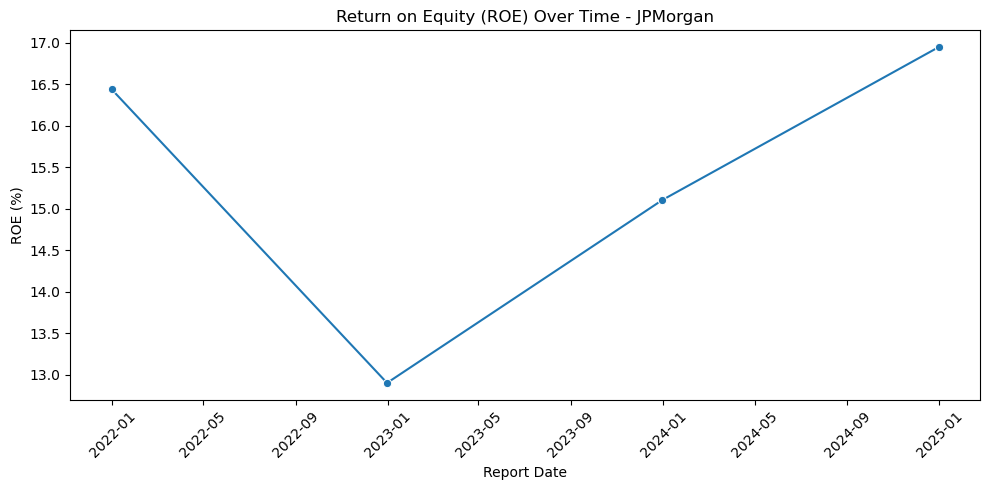

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.lineplot(data=financials_jpm, x='report_date', y='roe', marker='o')
plt.title("Return on Equity (ROE) Over Time - JPMorgan")
plt.xlabel("Report Date")
plt.ylabel("ROE (%)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [41]:
# Calculate Debt-to-Equity Ratio for JPMorgan
financials_jpm['de_ratio'] = (
    financials_jpm['Total Debt'] /
    financials_jpm['Stockholders Equity']
)


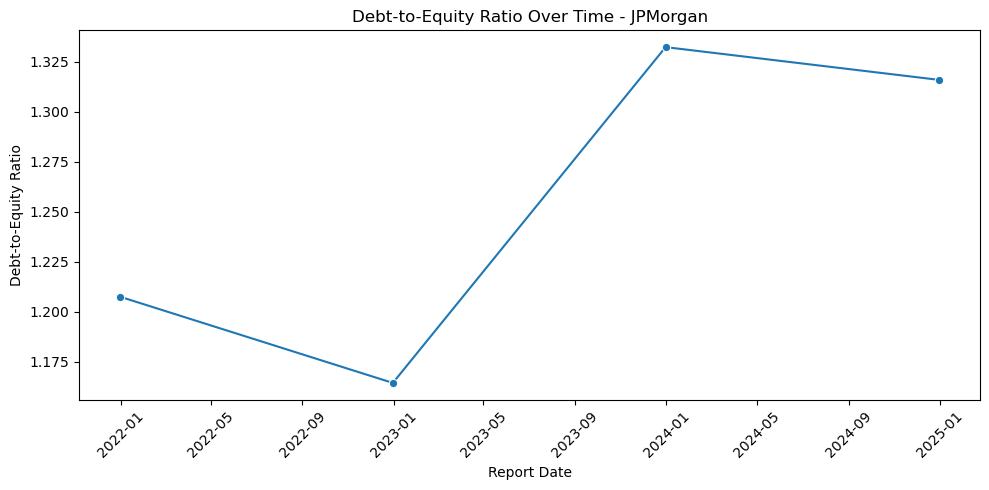

In [42]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=financials_jpm, x='report_date', y='de_ratio', marker='o')
plt.title("Debt-to-Equity Ratio Over Time - JPMorgan")
plt.xlabel("Report Date")
plt.ylabel("Debt-to-Equity Ratio")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [45]:
# Merge balance and cash flow for Bank of America
# Load BAC ticker again
ticker_bac = yf.Ticker("BAC")

# Get balance sheet and cash flow for BAC
balance_bac = ticker_bac.balance_sheet.T.reset_index()
balance_bac = balance_bac.rename(columns={'index': 'report_date'})
balance_bac['report_date'] = pd.to_datetime(balance_bac['report_date'])

cashflow_bac = ticker_bac.cashflow.T.reset_index()
cashflow_bac = cashflow_bac.rename(columns={'index': 'report_date'})
cashflow_bac['report_date'] = pd.to_datetime(cashflow_bac['report_date'])



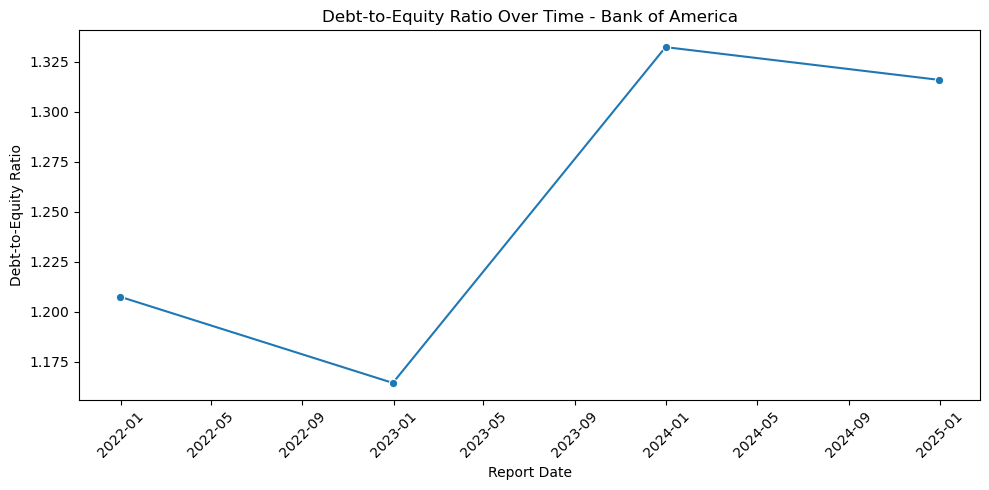

In [44]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=financials_bac, x='report_date', y='de_ratio', marker='o')
plt.title("Debt-to-Equity Ratio Over Time - Bank of America")
plt.xlabel("Report Date")
plt.ylabel("Debt-to-Equity Ratio")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [46]:
# Merge BAC financials
financials_bac = income_bac.merge(balance_bac, on='report_date', how='outer') \
                           .merge(cashflow_bac, on='report_date', how='outer')

# Calculate D/E Ratio
financials_bac['de_ratio'] = (
    financials_bac['Total Debt'] /
    financials_bac['Stockholders Equity']
)


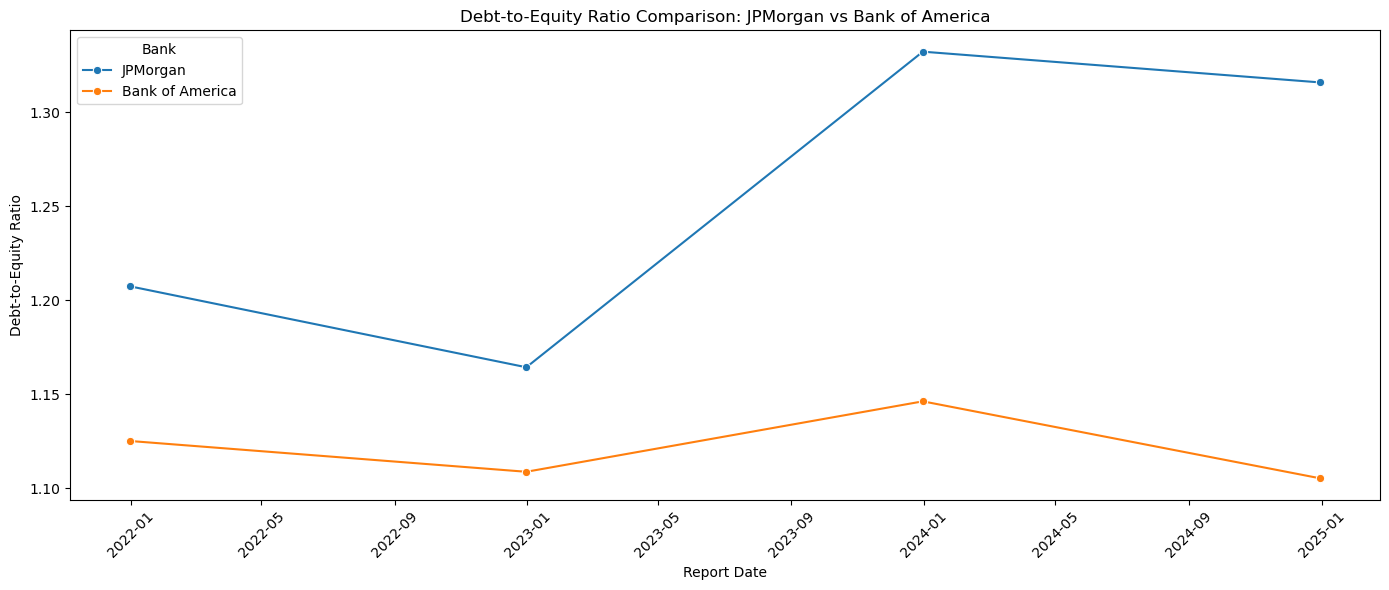

In [50]:
# Add bank name column to each dataframe
financials_jpm['Bank'] = 'JPMorgan'
financials_bac['Bank'] = 'Bank of America'

# Select relevant columns
de_cols = ['report_date', 'de_ratio', 'Bank']

# Combine data
de_comparison = pd.concat([financials_jpm[de_cols], financials_bac[de_cols]], ignore_index=True)

# Plot
plt.figure(figsize=(14, 6))
sns.lineplot(data=de_comparison, x='report_date', y='de_ratio', hue='Bank', marker='o')
plt.title('Debt-to-Equity Ratio Comparison: JPMorgan vs Bank of America')
plt.xlabel('Report Date')
plt.ylabel('Debt-to-Equity Ratio')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("Debt-to-Equity Ratio Comparison.png", dpi=300, bbox_inches='tight')
plt.show()



In [51]:
income_jpm['roe'] = (income_jpm['Net Income From Continuing Operation Net Minority Interest'] / financials_jpm['Stockholders Equity']) * 100
income_bac['roe'] = (income_bac['Net Income From Continuing Operation Net Minority Interest'] / financials_bac['Stockholders Equity']) * 100


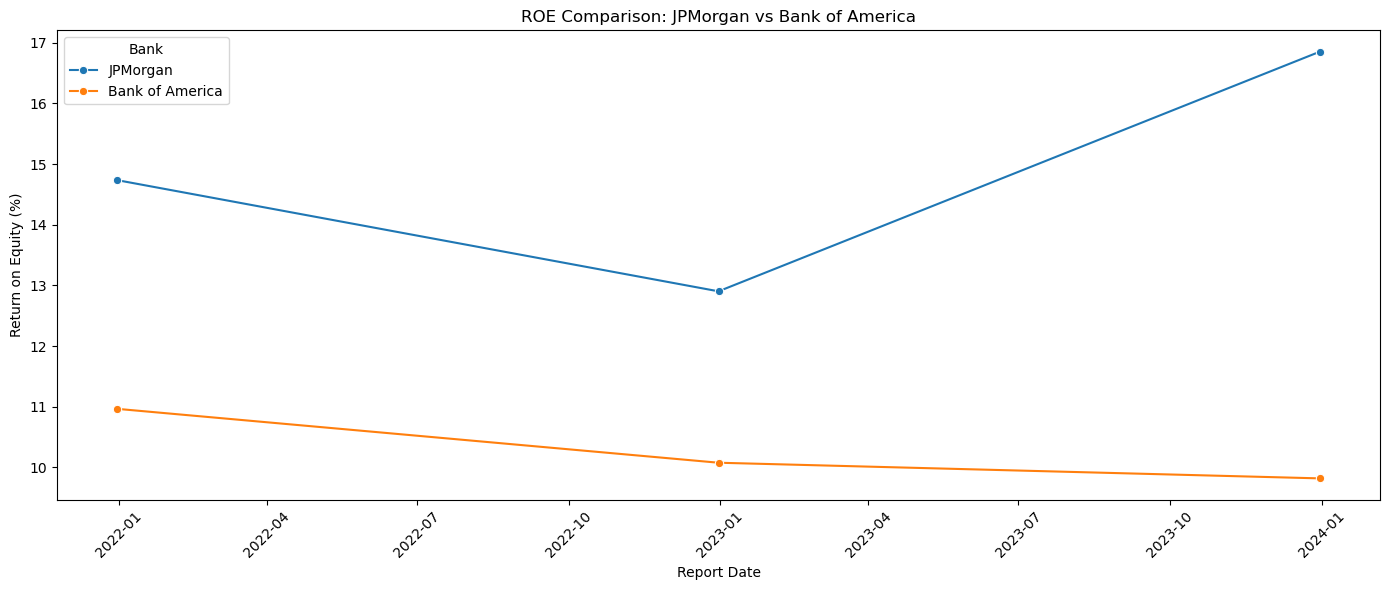

In [65]:
income_jpm['Bank'] = 'JPMorgan'
income_bac['Bank'] = 'Bank of America'
cols = ['report_date', 'roe', 'Bank']
comparison_roe = pd.concat([income_jpm[cols], income_bac[cols]], ignore_index=True)

plt.figure(figsize=(14, 6))
sns.lineplot(data=comparison_roe, x='report_date', y='roe', hue='Bank', marker='o')
plt.title('ROE Comparison: JPMorgan vs Bank of America')
plt.xlabel('Report Date')
plt.ylabel('Return on Equity (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("ROE Comparison.png", dpi=300, bbox_inches='tight')
plt.show()


In [56]:
[col for col in income_jpm.columns if 'cash' in col.lower()]
[col for col in income_bac.columns if 'cash' in col.lower()]


[]

In [57]:
cashflow_jpm = ticker_jpm.cashflow.T
cashflow_jpm.reset_index(inplace=True)
cashflow_jpm.rename(columns={'index': 'report_date'}, inplace=True)
cashflow_jpm['report_date'] = pd.to_datetime(cashflow_jpm['report_date'])


In [58]:
cashflow_bac = ticker_bac.cashflow.T
cashflow_bac.reset_index(inplace=True)
cashflow_bac.rename(columns={'index': 'report_date'}, inplace=True)
cashflow_bac['report_date'] = pd.to_datetime(cashflow_bac['report_date'])


In [59]:
[col for col in cashflow_jpm.columns if 'operat' in col.lower()]
[col for col in cashflow_bac.columns if 'operat' in col.lower()]


['Operating Cash Flow',
 'Cash Flow From Continuing Operating Activities',
 'Operating Gains Losses',
 'Net Income From Continuing Operations']

In [60]:
cashflow_jpm['operating_cash_flow_billion'] = cashflow_jpm['Operating Cash Flow'] / 1e9
cashflow_bac['operating_cash_flow_billion'] = cashflow_bac['Operating Cash Flow'] / 1e9


In [61]:
cashflow_jpm['Bank'] = 'JPMorgan'
cashflow_bac['Bank'] = 'Bank of America'


In [62]:
cols = ['report_date', 'operating_cash_flow_billion', 'Bank']
cashflow_comparison = pd.concat([cashflow_jpm[cols], cashflow_bac[cols]], ignore_index=True)


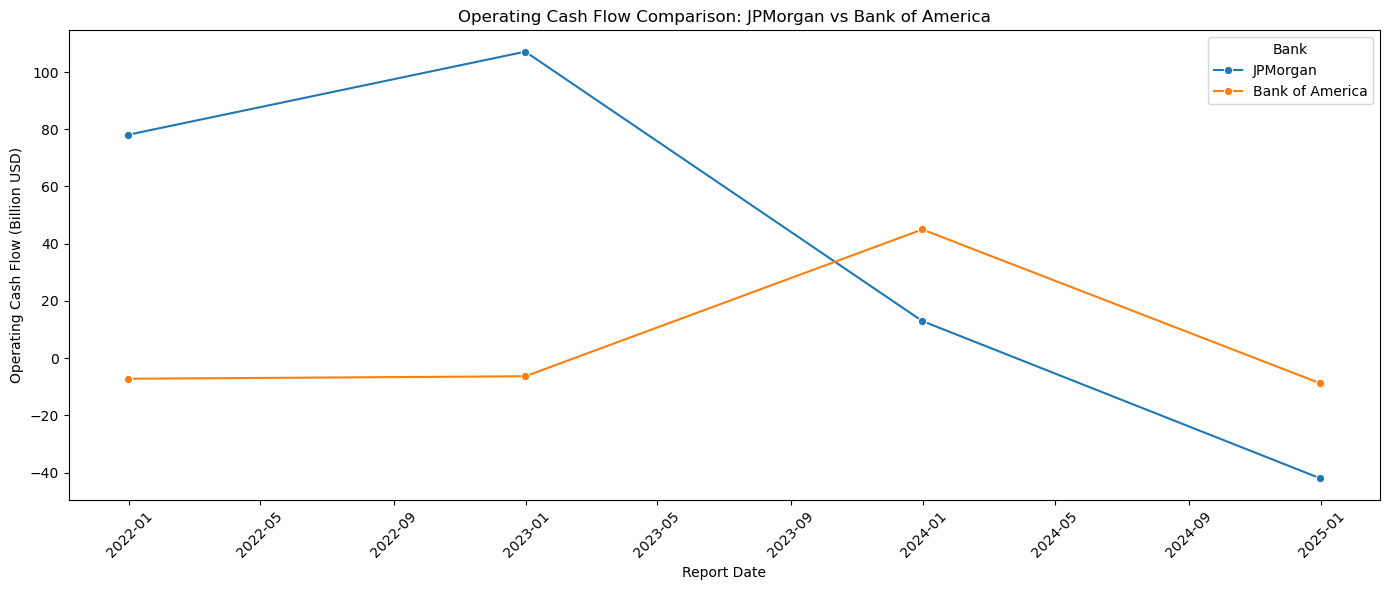

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 6))
sns.lineplot(data=cashflow_comparison, x='report_date', y='operating_cash_flow_billion', hue='Bank', marker='o')
plt.title("Operating Cash Flow Comparison: JPMorgan vs Bank of America")
plt.xlabel("Report Date")
plt.ylabel("Operating Cash Flow (Billion USD)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("Operating Cash Flow Comparison.png", dpi=300, bbox_inches='tight')
plt.show()
